In [6]:
import os
import pandas as pd
from sqlalchemy import create_engine
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
# Настройки подключения к БД

load_dotenv()
db_config = {
    'user': os.getenv('DB_USER'),
    'password': os.getenv('DB_PASSWORD'),
    'host': os.getenv('DB_HOST'),
    'port': os.getenv('DB_PORT'),
    'database': os.getenv('DB_NAME')
}

# Создаем подключение
db_url = f"mysql+pymysql://{db_config['user']}:{db_config['password']}@{db_config['host']}:{db_config['port']}/{db_config['database']}"
engine = create_engine(db_url)

# Выполнение SQL-запроса и сохранение результатов в датафрейме
sql_query = """
SELECT *
FROM market_data
"""
df = pd.read_sql(sql_query, engine)

In [8]:
df.head()

,open,high,low,close,adj_close,volume,ticker,asset_name,business_date,created_datetime
0,75.690002,76.459999,74.269997,76.080002,76.080002,317628,CL=F,WTI,2022-01-03,2024-11-01 12:03:51
1,76.019997,77.639999,75.699997,76.989998,76.989998,372848,CL=F,WTI,2022-01-04,2024-11-01 12:03:51
2,77.180000,78.580002,76.510002,77.849998,77.849998,397898,CL=F,WTI,2022-01-05,2024-11-01 12:03:51
3,77.239998,80.239998,76.730003,79.459999,79.459999,476665,CL=F,WTI,2022-01-06,2024-11-01 12:03:51
4,79.620003,80.470001,78.519997,78.900002,78.900002,414434,CL=F,WTI,2022-01-07,2024-11-01 12:03:51


In [26]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,created_datetime
count,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2.833000e+03,2833
mean,246.732962,248.905542,244.425697,246.747377,243.863559,3.355934e+07,2024-10-27 18:00:27.000000256
min,66.279999,67.699997,63.639999,65.750000,65.750000,0.000000e+00,2024-10-27 18:00:27
25%,82.830002,83.739998,81.760002,82.790001,82.790001,5.994500e+04,2024-10-27 18:00:27
50%,129.570007,137.000000,122.500000,127.980003,127.980003,8.722440e+05,2024-10-27 18:00:27
75%,409.179993,412.089996,407.239990,409.609985,400.313232,6.259800e+07,2024-10-27 18:00:27
max,585.909973,586.119995,582.580017,584.590027,584.590027,2.517839e+08,2024-10-27 18:00:27
std,170.180847,170.768652,169.493737,170.208636,167.594109,3.899930e+07,NaN


In [33]:
df["Ticker"].unique()

array(['WTI', 'BRENT', 'S&P 500', 'Nasdaq-100'], dtype=object)

In [32]:
df.describe(include = 'object')

,Ticker,business_date
count,2833,2833
unique,4,709
top,BRENT,2022-01-03
freq,709,4


In [40]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Ticker,business_date,created_datetime
0,75.690002,76.459999,74.269997,76.080002,76.080002,317628,WTI,2022-01-03,2024-10-27 18:00:27
1,76.019997,77.639999,75.699997,76.989998,76.989998,372848,WTI,2022-01-04,2024-10-27 18:00:27
2,77.180000,78.580002,76.510002,77.849998,77.849998,397898,WTI,2022-01-05,2024-10-27 18:00:27
3,77.239998,80.239998,76.730003,79.459999,79.459999,476665,WTI,2022-01-06,2024-10-27 18:00:27
4,79.620003,80.470001,78.519997,78.900002,78.900002,414434,WTI,2022-01-07,2024-10-27 18:00:27


In [58]:
df = df.drop(columns=['Adj Close'])

In [61]:
df = df.set_index("business_date")

TypeError: DataFrame.set_index() got an unexpected keyword argument 'axis'

OHLC = Weighted OHLC Average

In [109]:
df['OHLS'] = df.apply(lambda x: (x['Open'] +  x['High'] +  x['Low'] +  x['Close']) /4, axis = 1)

In [60]:
df.head(2)

,Open,High,Low,Close,Volume,Ticker,created_datetime
business_date,,,,,,,
2022-01-03,75.690002,76.459999,74.269997,76.080002,317628,WTI,2024-10-27 18:00:27
2022-01-04,76.019997,77.639999,75.699997,76.989998,372848,WTI,2024-10-27 18:00:27


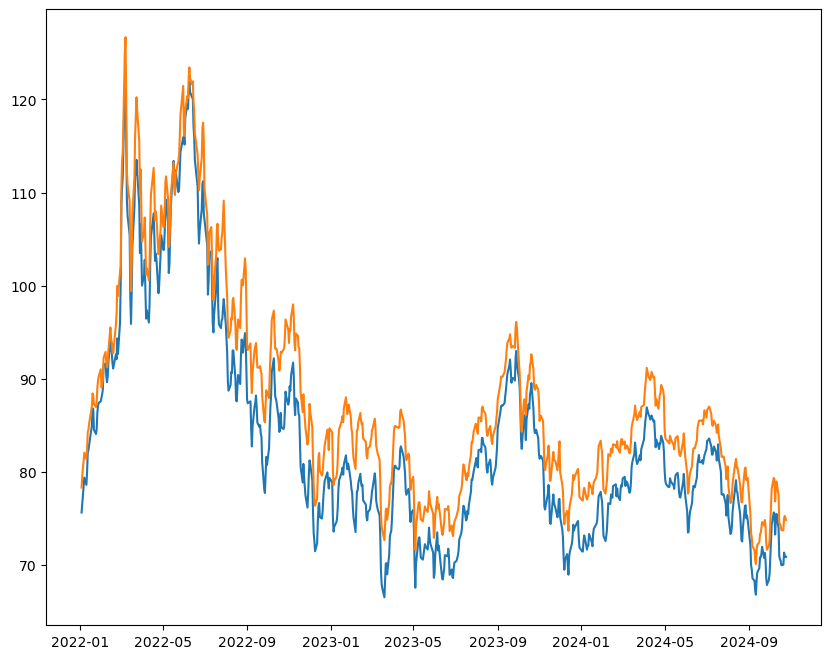

In [110]:
plt.figure(figsize=(10, 8))
plt.plot(df[df['Ticker'] == 'WTI']["OHLS"])
plt.plot(df[df['Ticker'] == 'BRENT']["OHLS"])

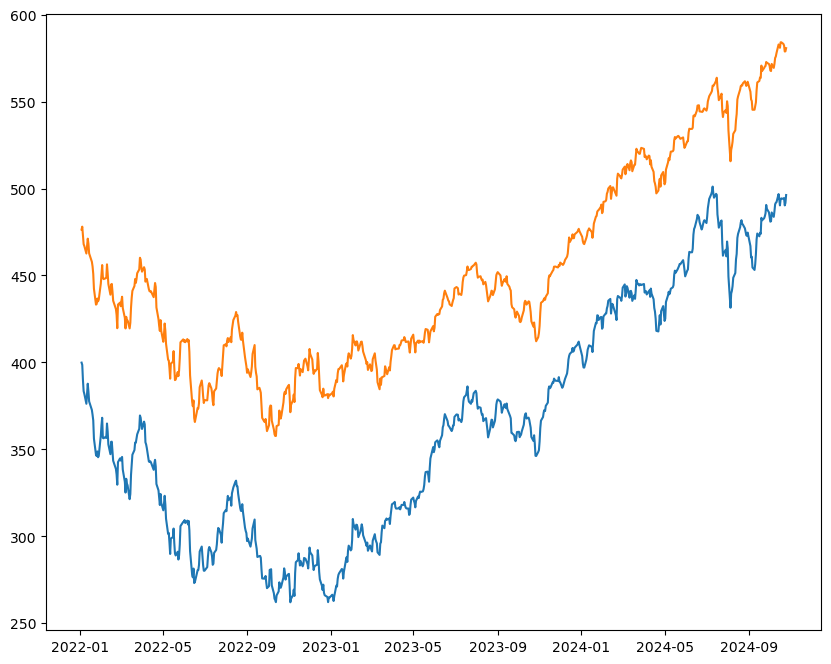

In [111]:
plt.figure(figsize=(10, 8))
plt.plot(df[df['Ticker'] == 'Nasdaq-100']["OHLS"])
plt.plot(df[df['Ticker'] == 'S&P 500']["OHLS"])

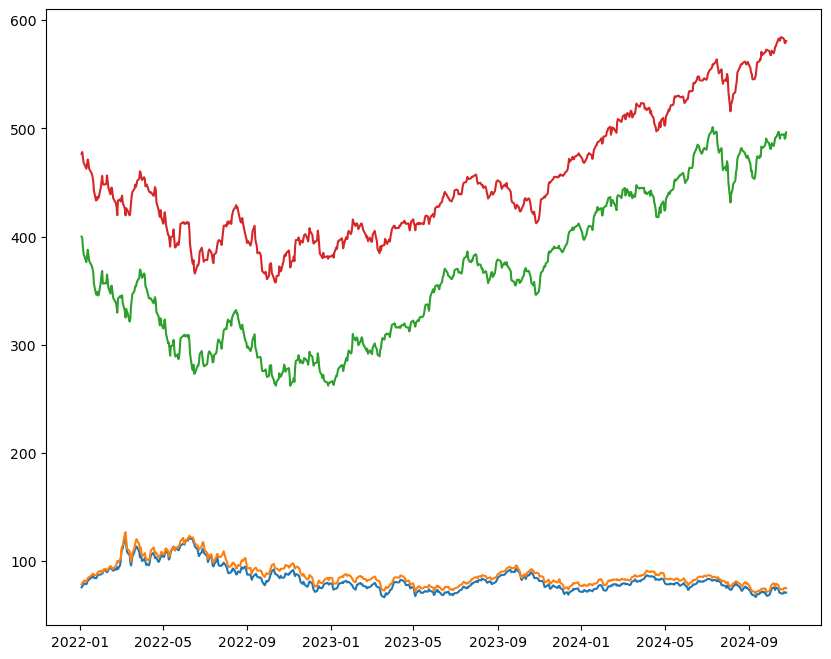

In [112]:
plt.figure(figsize=(10, 8))
plt.plot(df[df['Ticker'] == 'WTI']["OHLS"])
plt.plot(df[df['Ticker'] == 'BRENT']["OHLS"])
plt.plot(df[df['Ticker'] == 'Nasdaq-100']["OHLS"])
plt.plot(df[df['Ticker'] == 'S&P 500']["OHLS"])

In [86]:
corr = pd.DataFrame()

In [107]:
corr["WTI"] = df[df['Ticker'] == 'WTI']["OHLS"]
corr["Nasdaq-100"] = df[df['Ticker'] == 'Nasdaq-100']["OHLS"]
corr["BRENT"] = df[df['Ticker'] == 'BRENT']["OHLS"]
corr["S&P 500"] = df[df['Ticker'] == 'S&P 500']["OHLS"]

<Axes: >

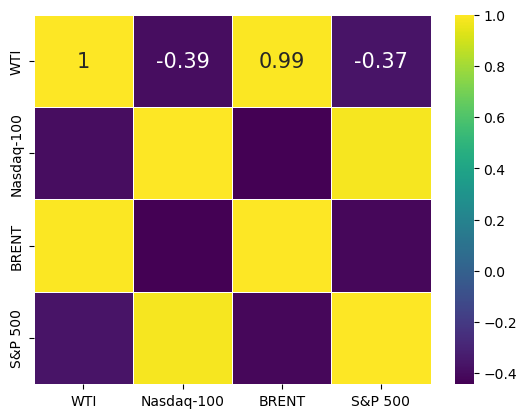

In [108]:
sns.heatmap(corr.corr(numeric_only=True),
           linewidths=0.5,
            annot=True,
            cmap='viridis',
            annot_kws={'size': 15})

In [113]:
df.head()

,Open,High,Low,Close,Volume,Ticker,created_datetime,OHLS
business_date,,,,,,,,
2022-01-03,75.690002,76.459999,74.269997,76.080002,317628,WTI,2024-10-27 18:00:27,75.625000
2022-01-04,76.019997,77.639999,75.699997,76.989998,372848,WTI,2024-10-27 18:00:27,76.587498
2022-01-05,77.180000,78.580002,76.510002,77.849998,397898,WTI,2024-10-27 18:00:27,77.530001
2022-01-06,77.239998,80.239998,76.730003,79.459999,476665,WTI,2024-10-27 18:00:27,78.417500
2022-01-07,79.620003,80.470001,78.519997,78.900002,414434,WTI,2024-10-27 18:00:27,79.377501


In [118]:
WTI = df[df['Ticker'] == 'WTI']
Nasdaq = df[df['Ticker'] == 'Nasdaq-100']
BRENT = df[df['Ticker'] == 'BRENT']
SP500 = df[df['Ticker'] == 'S&P 500']

Fd

In [197]:
def simple_moving_average(prices, window_size):
    k = 0
    p = 0
    sma = []
    for i in prices:
        if k <= (len(prices)- window_size):
            sma.append((prices[k:k+window_size].sum())/window_size)
        else:
            p+=1
            sma.append((prices[k:k+window_size].sum())/(window_size-p))
        k+=1
    return sma

In [283]:
def RSI(prices, window_size):
    k = 0
    sma_u = []
    sma_d = []
    RSI = []
    u = 0
    for i in range(len(prices)):
        if i == 0:
            u = prices.iloc[0]
        else:
            u = prices.iloc[i] - prices.iloc[i-1]
        if u > 0:
            sma_u.append(u)
            sma_d.append(0)
        else:
            sma_d.append(abs(u))
            sma_u.append(0)
    print(len(sma_u))
    print(sma_d[len(sma_d) - 14: len(sma_d)])
    sma_u = simple_moving_average(np.array(sma_u), window_size)
    sma_d = simple_moving_average(np.array(sma_d), window_size)
    for i in range(len(prices)):
        if sma_d[i] != 0:
            RSI.append(100 - (100/(1 + (sma_u[i]/sma_d[i]))))
        else:
            print(sma_u[i])
            print(sma_d[i])
            RSI.append(RSI[i-1])
    return RSI

In [234]:
WTI.shape

(708, 10)

In [218]:
WTI.loc[:, 'sma'] = simple_moving_average(WTI['OHLS'], 30)

In [219]:
WTI.head(2)

,Open,High,Low,Close,Volume,Ticker,created_datetime,OHLS,sma
business_date,,,,,,,,,
2022-01-03,75.690002,76.459999,74.269997,76.080002,317628,WTI,2024-10-27 18:00:27,75.625000,85.263667
2022-01-04,76.019997,77.639999,75.699997,76.989998,372848,WTI,2024-10-27 18:00:27,76.587498,85.848917


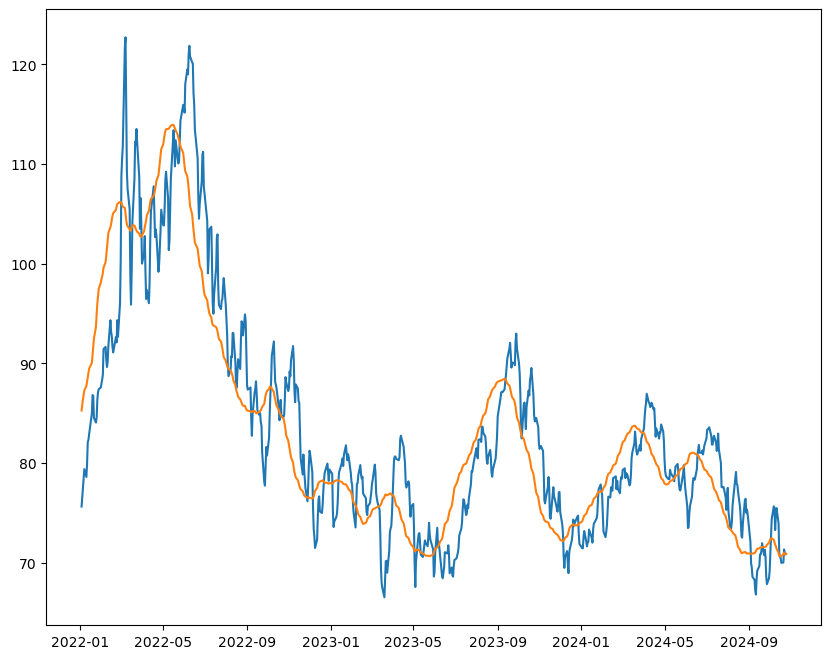

In [220]:
plt.figure(figsize=(10, 8))
plt.plot(WTI["OHLS"])
plt.plot(WTI["sma"])

In [284]:
WTI.loc[:, 'RSI'] = RSI(WTI['Close'], 14)

708
[3.5699996948242188, 0.3300018310546875, 0, 0.29000091552734375, 1.7299957275390625, 3.25, 0.19000244140625, 0, 1.4499969482421875, 0, 0, 1.3199996948242188, 0.5799942016601562, 0]
1.5
0.0


In [285]:
WTI.tail(14)

,Open,High,Low,Close,Volume,Ticker,created_datetime,OHLS,sma,RSI
business_date,,,,,,,,,,
2024-10-08,77.330002,78.459999,72.690002,73.570000,496760,WTI,2024-10-27 18:00:27,75.512501,72.064464,36.354530
2024-10-09,73.839996,74.449997,71.529999,73.239998,401159,WTI,2024-10-27 18:00:27,73.264997,71.799230,44.268296
2024-10-10,73.389999,76.239998,73.260002,75.849998,321453,WTI,2024-10-27 18:00:27,74.684999,71.677083,45.177359
2024-10-11,75.739998,76.040001,74.529999,75.559998,315302,WTI,2024-10-27 18:00:27,75.467499,71.403636,34.546802
2024-10-14,75.050003,75.080002,71.809998,73.830002,273455,WTI,2024-10-27 18:00:27,73.942501,70.997250,35.307517
2024-10-15,71.510002,72.120003,69.709999,70.580002,328738,WTI,2024-10-27 18:00:27,70.980001,70.670000,40.646845
2024-10-16,70.989998,71.309998,69.639999,70.389999,222437,WTI,2024-10-27 18:00:27,70.582499,70.631250,56.776571
2024-10-17,70.680000,71.110001,69.440002,70.669998,188161,WTI,2024-10-27 18:00:27,70.475000,70.638214,58.125035
2024-10-18,70.750000,71.230003,68.690002,69.220001,95768,WTI,2024-10-27 18:00:27,69.972502,70.665416,56.606257


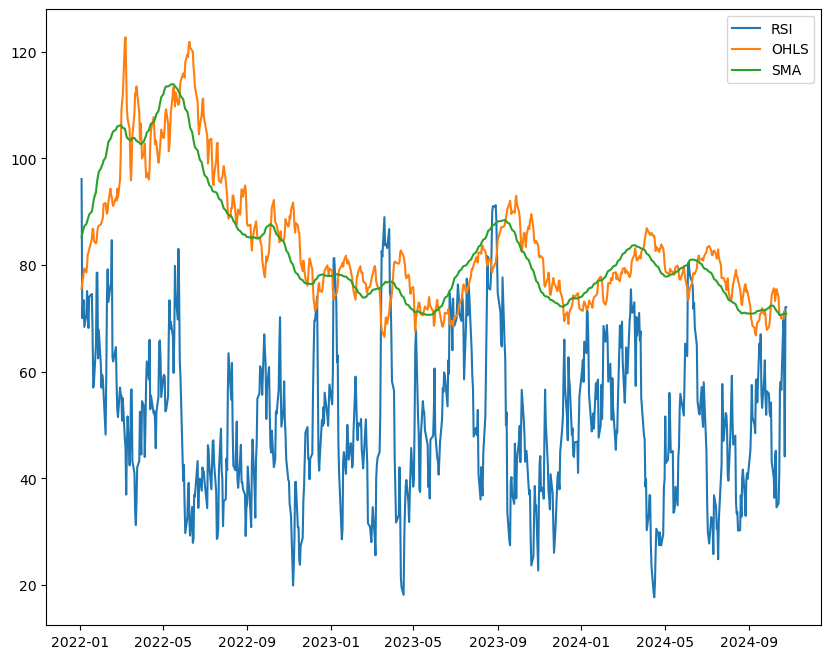

In [297]:
plt.figure(figsize=(10, 8))
plt.plot(WTI["RSI"])
plt.plot(WTI["OHLS"], label='OHLS')
plt.plot(WTI["sma"], label='SMA')
#plt.plot(WTI["Volume"]/10000,  label='Volume')
plt.legend(["RSI", "OHLS", "SMA"])

Значения RSI (https://habr.com/ru/companies/otus/articles/823500/) интерпретируются так:

Выше 70 — актив перекуплен, возможно, будет коррекция вн. .

Ниже 30 — актив перепродан, возможно, ожидается рост . ены.

In [300]:
def calculate_stochastic_oscillator(data, k_period=14, d_period=3):
    low_min = data['Low'].rolling(window=k_period).min()
    high_max = data['High'].rolling(window=k_period).max()
    data.loc[:,'%K'] = 100 * ((data['Close'] - low_min) / (high_max - low_min))
    data.loc[:,'%D'] = data['%K'].rolling(window=d_period).mean()
    return data

In [301]:
WTI = calculate_stochastic_oscillator(WTI)

In [315]:
WTI.head()

,Open,High,Low,Close,Volume,Ticker,created_datetime,OHLS,sma,RSI,%K,%D
business_date,,,,,,,,,,,,
2022-01-03,75.690002,76.459999,74.269997,76.080002,317628,WTI,2024-10-27 18:00:27,75.625000,85.263667,96.131347,NaN,NaN
2022-01-04,76.019997,77.639999,75.699997,76.989998,372848,WTI,2024-10-27 18:00:27,76.587498,85.848917,70.049923,NaN,NaN
2022-01-05,77.180000,78.580002,76.510002,77.849998,397898,WTI,2024-10-27 18:00:27,77.530001,86.386667,72.179304,NaN,NaN
2022-01-06,77.239998,80.239998,76.730003,79.459999,476665,WTI,2024-10-27 18:00:27,78.417500,86.857667,73.399029,NaN,NaN
2022-01-07,79.620003,80.470001,78.519997,78.900002,414434,WTI,2024-10-27 18:00:27,79.377501,87.280333,68.399400,NaN,NaN


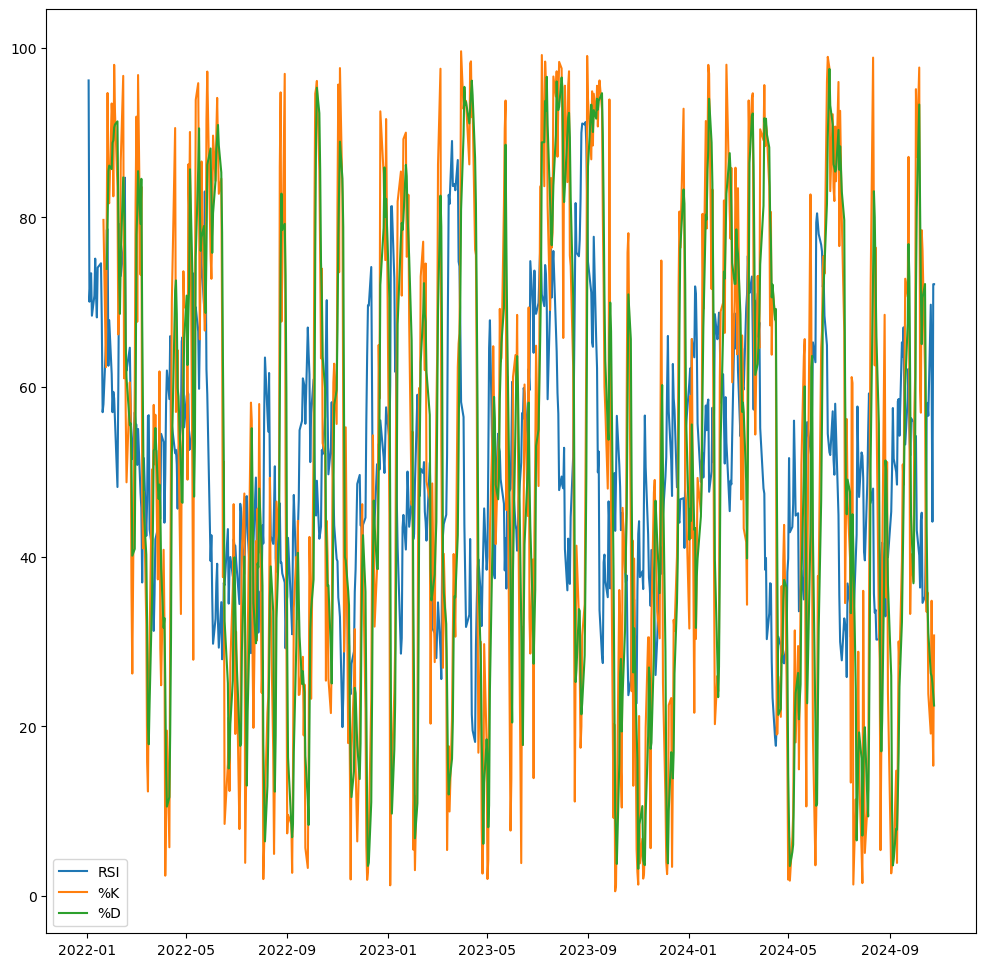

In [317]:
plt.figure(figsize=(12, 12))
plt.plot(WTI["RSI"])
plt.plot(WTI["%K"])
plt.plot(WTI["%D"])
#plt.plot(WTI["Volume"]/10000,  label='Volume')
plt.legend(["RSI", "%K", "%D"])

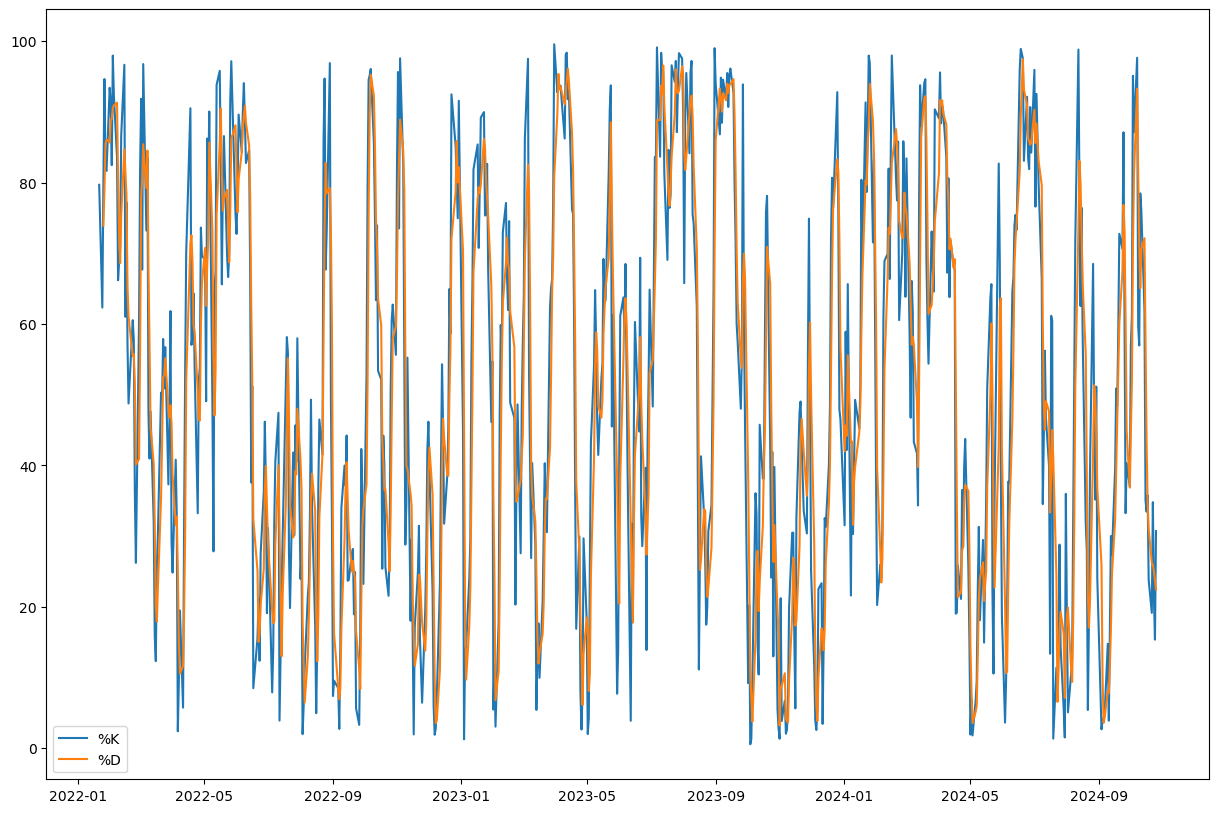

In [325]:
plt.figure(figsize=(15, 10))
plt.plot(WTI["%K"])
plt.plot(WTI["%D"])
#plt.plot(WTI["Volume"]/10000,  label='Volume')
plt.legend(["%K", "%D"])

In [326]:
def calculate_macd(data, short_period=12, long_period=26, signal_period=9):
    # Рассчитываем короткую EMA
    ema_short = data.ewm(span=short_period, adjust=False).mean()
    
    # Рассчитываем длинную EMA
    ema_long = data.ewm(span=long_period, adjust=False).mean()
    
    # Вычисляем MACD как разницу между короткой и длинной EMA
    macd = ema_short - ema_long
    
    # Рассчитываем сигнальную линию как EMA от MACD
    signal_line = macd.ewm(span=signal_period, adjust=False).mean()
    return macd, signal_line

In [328]:
macd, signal = calculate_macd(WTI['Close'])

In [330]:
WTI.loc[:,'macd'] = macd
WTI.loc[:,'signal'] = signal

In [352]:
def percentage_change(data):
    data_change = []
    for i in range(len(data)):
        if i == 0:
            data_change.append(1)
        else:
            if data.iloc[i-1] != 0:
                data_change.append((data.iloc[i] - data.iloc[i-1])*100/data.iloc[i-1])
            else:
                data_change.append(0)
    return data_change

In [353]:
WTI.loc[:,'volume_change'] = percentage_change(WTI["Volume"])

In [354]:
WTI.loc[:,'OHLS_change'] = percentage_change(WTI["OHLS"])

In [355]:
WTI

,Open,High,Low,Close,Volume,Ticker,created_datetime,OHLS,sma,RSI,%K,%D,macd,signal,volume_change,OHLS_change
business_date,,,,,,,,,,,,,,,,
2022-01-03,75.690002,76.459999,74.269997,76.080002,317628,WTI,2024-10-27 18:00:27,75.625000,85.263667,96.131347,NaN,NaN,0.000000,0.000000,1.000000,1.000000
2022-01-04,76.019997,77.639999,75.699997,76.989998,372848,WTI,2024-10-27 18:00:27,76.587498,85.848917,70.049923,NaN,NaN,0.072592,0.014518,17.385117,1.272724
2022-01-05,77.180000,78.580002,76.510002,77.849998,397898,WTI,2024-10-27 18:00:27,77.530001,86.386667,72.179304,NaN,NaN,0.197243,0.051063,6.718556,1.230622
2022-01-06,77.239998,80.239998,76.730003,79.459999,476665,WTI,2024-10-27 18:00:27,78.417500,86.857667,73.399029,NaN,NaN,0.421090,0.125069,19.795777,1.144717
2022-01-07,79.620003,80.470001,78.519997,78.900002,414434,WTI,2024-10-27 18:00:27,79.377501,87.280333,68.399400,NaN,NaN,0.546997,0.209454,-13.055500,1.224218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-21,69.459999,71.029999,69.000000,70.559998,92584,WTI,2024-10-27 18:00:27,70.012499,70.803999,69.697014,19.140182,26.248149,-0.218608,0.097117,-3.324701,0.057161
2024-10-22,70.489998,72.660004,70.050003,72.089996,330456,WTI,2024-10-27 18:00:27,71.322500,71.001874,61.460513,34.800359,25.921923,-0.163269,0.045040,256.925603,1.871096
2024-10-23,71.349998,71.720001,70.129997,70.769997,293835,WTI,2024-10-27 18:00:27,70.992498,70.894999,44.117726,21.289610,25.076717,-0.223352,-0.008638,-11.081959,-0.462690


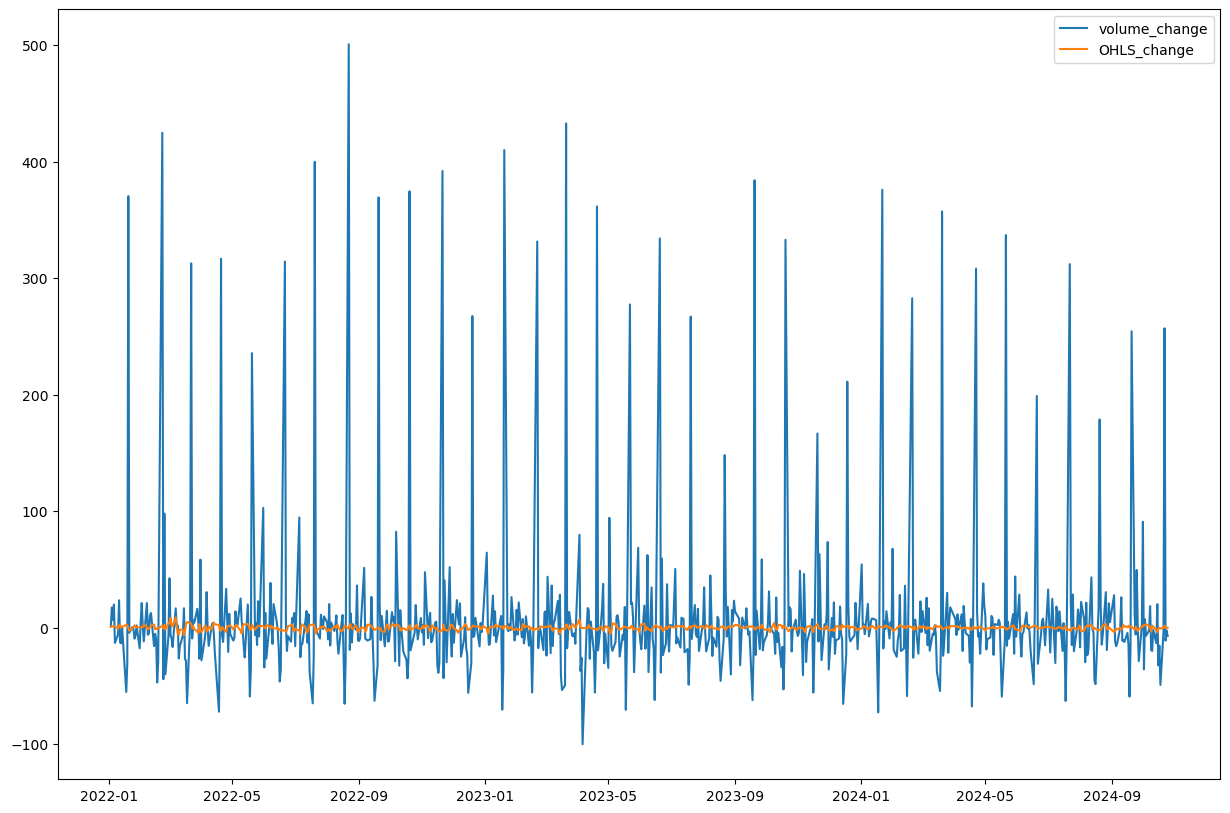

In [357]:
plt.figure(figsize=(15, 10))
plt.plot(WTI["volume_change"])
plt.plot(WTI["OHLS_change"])
plt.legend(["volume_change", "OHLS_change"])